In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import retrieve_bond

In [ ]:
df = retrieve_bond()
df.head()


,Date,df_3m,df_6m,df_1y,df_2y,df_3y,df_4y,df_5y,df_6y,df_8y,df_10y
0,2024-11-08,99.5,99.67,100.742,101.498,107.752,112.586,98.645,101.024,101.290,96.508
1,2024-11-07,99.5,99.67,100.747,101.505,107.805,112.621,98.653,101.030,101.261,96.544
2,2024-11-06,99.5,99.67,100.759,101.518,107.807,112.633,98.620,101.011,101.213,96.447
3,2024-11-05,99.5,99.67,100.720,101.403,107.632,112.410,98.347,100.696,100.846,96.054
4,2024-11-04,99.5,99.67,100.752,101.488,107.822,112.684,98.724,101.171,101.544,97.012


100.20193341684636


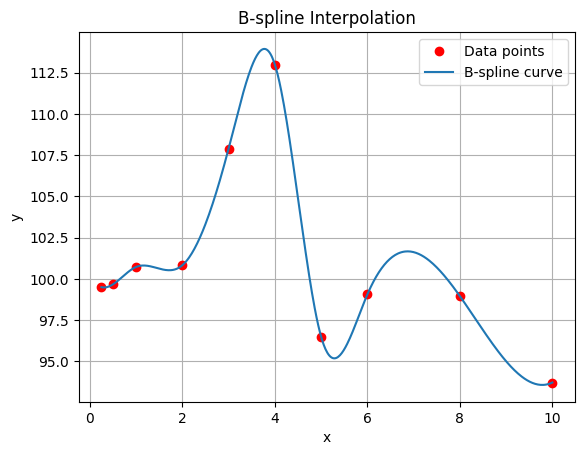

In [6]:
from scipy.interpolate import CubicSpline, UnivariateSpline

def interpolate_rate(df, date):
    df_filter = df[df['Date']==date].drop(columns='Date')
    x = [1/4, 1/2, 1, 2, 3, 4, 5, 6, 8, 10]
    y = df_filter.values.flatten()

    spline = CubicSpline(x, y)
    # spline = UnivariateSpline(x, y, s=1.0)

    x_smooth = np.linspace(min(x), max(x), 500)
    y_smooth = spline(x_smooth)

    print(spline(0))


    plt.plot(x, y, 'o', label='Data points', color='red')
    plt.plot(x_smooth, y_smooth, label='B-spline curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('B-spline Interpolation')
    plt.grid(True)
    plt.show()

interpolate_rate(df, '2024-03-25')